GIF saved as 'gwo_hunting.gif'


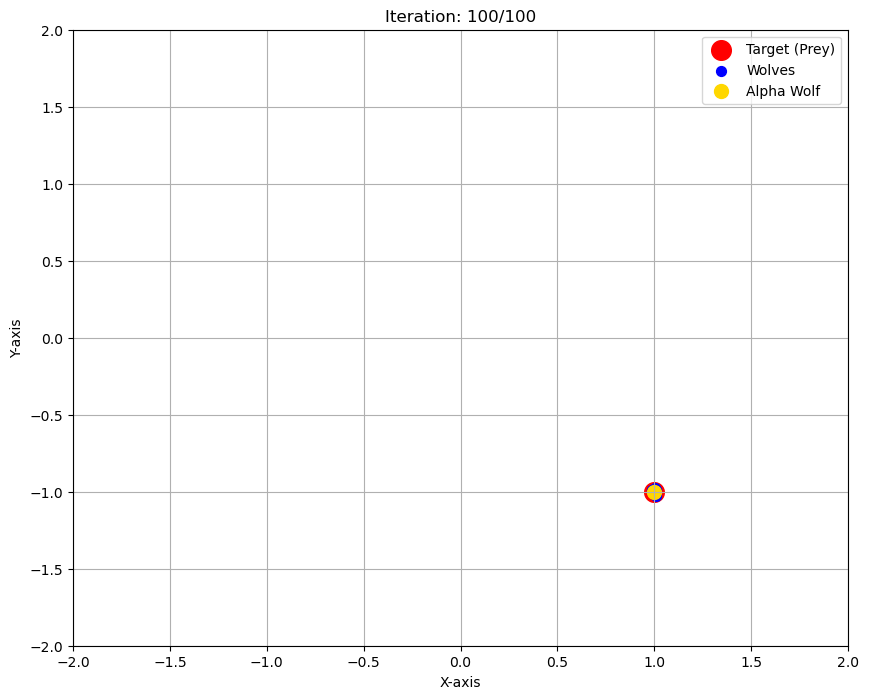

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
NUM_WOLVES = 30
NUM_ITERATIONS = 100
DIMENSIONS = 2
TARGET_ARRAY = np.array([1, -1])  # Target array

# Objective function
def objective_function(x):
    return np.sum((x - TARGET_ARRAY) ** 2)

# Grey Wolf Optimizer class
class GreyWolfOptimizer:
    def __init__(self):
        self.alpha_fitness = np.inf
        self.beta_fitness = np.inf
        self.delta_fitness = np.inf
        self.alpha_pos = None
        self.beta_pos = None
        self.delta_pos = None
        self.population = np.random.uniform(low=-2, high=2, size=(NUM_WOLVES, DIMENSIONS))
        self.positions_history = []  # Store all wolves' positions per iteration
        self.alpha_history = []      # Store alpha positions

    def update_positions(self, iteration):
        # Update alpha, beta, delta wolves
        for i in range(NUM_WOLVES):
            fitness = objective_function(self.population[i])
            if fitness < self.alpha_fitness:
                self.delta_fitness = self.beta_fitness
                self.delta_pos = self.beta_pos
                self.beta_fitness = self.alpha_fitness
                self.beta_pos = self.alpha_pos
                self.alpha_fitness = fitness
                self.alpha_pos = self.population[i].copy()
            elif fitness < self.beta_fitness:
                self.delta_fitness = self.beta_fitness
                self.delta_pos = self.beta_pos
                self.beta_fitness = fitness
                self.beta_pos = self.population[i].copy()
            elif fitness < self.delta_fitness:
                self.delta_fitness = fitness
                self.delta_pos = self.population[i].copy()

        # Store history for animation
        self.positions_history.append(self.population.copy())
        self.alpha_history.append(self.alpha_pos.copy())

        # Update positions
        a = 2 - iteration * (2 / NUM_ITERATIONS)
        for i in range(NUM_WOLVES):
            r1 = np.random.rand(DIMENSIONS)
            r2 = np.random.rand(DIMENSIONS)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = np.abs(C1 * self.alpha_pos - self.population[i])
            X1 = self.alpha_pos - A1 * D_alpha

            r1 = np.random.rand(DIMENSIONS)
            r2 = np.random.rand(DIMENSIONS)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = np.abs(C2 * self.beta_pos - self.population[i])
            X2 = self.beta_pos - A2 * D_beta

            r1 = np.random.rand(DIMENSIONS)
            r2 = np.random.rand(DIMENSIONS)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = np.abs(C3 * self.delta_pos - self.population[i])
            X3 = self.delta_pos - A3 * D_delta

            self.population[i] = (X1 + X2 + X3) / 3
            self.population[i] = np.clip(self.population[i], -2, 2)

# Initialize and run GWO
gwo = GreyWolfOptimizer()
for iteration in range(NUM_ITERATIONS):
    gwo.update_positions(iteration)

# Create the animation
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title("Grey Wolf Optimizer - Hunting the Target")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.grid(True)

# Plot the target (prey)
target_point = ax.scatter(*TARGET_ARRAY, color='red', s=200, label='Target (Prey)')

# Plot the wolves
wolves_scatter = ax.scatter([], [], color='blue', s=50, label='Wolves')
alpha_scatter = ax.scatter([], [], color='gold', s=100, label='Alpha Wolf')

# Add legend
ax.legend()

def update(frame):
    wolves_scatter.set_offsets(gwo.positions_history[frame])
    alpha_scatter.set_offsets([gwo.alpha_history[frame]])
    ax.set_title(f"Iteration: {frame + 1}/{NUM_ITERATIONS}")
    return wolves_scatter, alpha_scatter

# Create the animation
ani = FuncAnimation(
    fig, 
    update, 
    frames=NUM_ITERATIONS, 
    interval=500, 
    blit=True
)

# Save as GIF
ani.save("gwo_hunting.gif", writer=PillowWriter(fps=10))
print("GIF saved as 'gwo_hunting.gif'")